<a href="https://colab.research.google.com/github/kusalkalinga00/plant-disease-recognition-colab/blob/main/Automated_Plant_Disease_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/plant_dataset'

/content/drive/MyDrive/plant_dataset


In [4]:
size=224

In [5]:
train_directory = 'train'
valid_directory = 'test'

In [6]:
inception = InceptionV3(input_shape=[size,size] + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [7]:
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob(train_directory+'/*')

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,109,990 (84.34 MB)

 Trainable params: 307,206 (1.17 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (size, size),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 370 images belonging to 6 classes.


In [15]:
test_set = test_datagen.flow_from_directory(valid_directory,
                                            target_size = (size, size),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 15 images belonging to 6 classes.


In [16]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 211s 16s/step - accuracy: 0.3690 - loss: 9.4767 - val_accuracy: 0.6000 - val_loss: 14.6738
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.6633 - loss: 6.2352 - val_accuracy: 0.8000 - val_loss: 0.3921
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.7523 - loss: 2.7904 - val_accuracy: 0.9333 - val_loss: 0.7103
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.8694 - loss: 0.9159 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.8849 - loss: 0.8177 - val_accuracy: 1.0000 - val_loss: 9.0454e-05
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.9047 - loss: 0.5321 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.9801 - loss: 0.1241 - val_accuracy: 0.9333 - val_loss: 0.1516
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.9591 - loss: 0.1691 - val_accuracy: 0.9333 - va

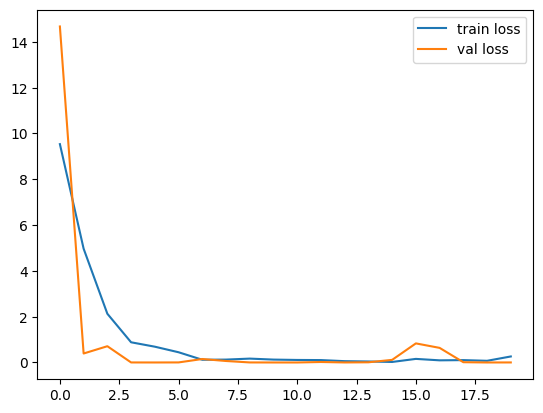

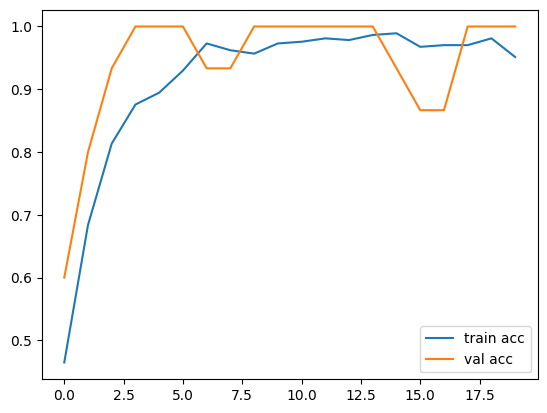

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('plant_disease_model.keras')

In [21]:
y_pred = model.predict(test_set)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [24]:
model=load_model('plant_disease_model.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [25]:
img=image.load_img('/content/drive/MyDrive/plant_dataset/test/brinjal-tobacco-mosaic-virus/20240727_154144.jpg',target_size=(size,size))

In [26]:
x=image.img_to_array(img)
x=x/255

In [27]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [28]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


array([[1.7066431e-01, 3.5922779e-04, 6.9212341e-03, 5.8051902e-01,
        6.0259197e-02, 1.8127695e-01]], dtype=float32)

In [29]:
np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([3])

In [30]:
class_map = training_set.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [31]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    prob = prediction
    print(prob[0])

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[2.2129844e-07 1.4914542e-26 1.1235192e-12 9.9999976e-01 6.6808467e-25
 1.5775662e-14]


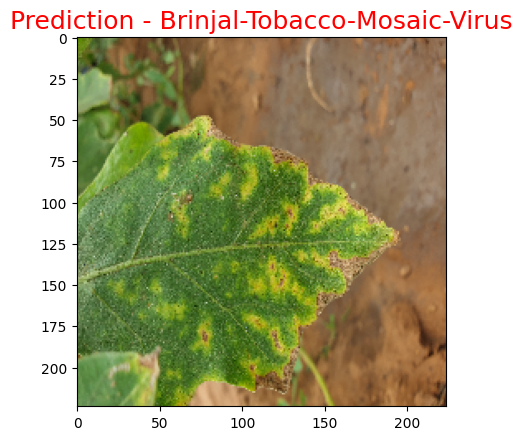

In [32]:
predict_image('/content/drive/MyDrive/plant_dataset/test/brinjal-tobacco-mosaic-virus/20240727_154144.jpg', model)
